# OLYMPIC DATA ANALYSIS
### DATA 602 - ASSIGNMENT 7

The data used for this project is from kaggle and can be found here. 

https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018

In [2]:
# Import necessary libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import re
from datetime import datetime as dt
import numpy as np

______________
## Initial data exploration

In [4]:
# Read csv files from github into a data frame.

# Use .head() to look at the first couple rows of each data frame
# Use .info() to obtain information about data types, number of observations, missing values
# Use .describe() to view summary statistics 

In [5]:
athletes = pd.read_csv("https://raw.githubusercontent.com/D-hartog/DATA_602/main/assignment7/olympic_athletes.csv")
athletes.head(10)

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN
5,https://olympics.com/en/athletes/matt-graham,Matt GRAHAM,3,Sochi 2014,1994.0,\n\n\n1\n\nS\n\n,NaN
6,https://olympics.com/en/athletes/ikuma-horishima,Ikuma HORISHIMA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN
7,https://olympics.com/en/athletes/daichi-hara,Daichi HARA,2,PyeongChang 2018,1997.0,\n\n\n1\n\nB\n\n,NaN
8,https://olympics.com/en/athletes/laurent-dumais,Laurent DUMAIS,1,Beijing 2022,1996.0,NaN,NaN
9,https://olympics.com/en/athletes/james-matheson,James MATHESON,2,PyeongChang 2018,1995.0,NaN,NaN


In [6]:
athletes.info()

# Another way of seeing the number of na values for each column and can be used for each dataframe
# athletes.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [174]:
athletes.describe()

,games_participations,athlete_year_birth
count,75904.000000,73448.000000
mean,1.535874,1961.619377
std,0.854563,28.129576
min,0.000000,1836.000000
25%,1.000000,1946.000000
50%,1.000000,1968.000000
75%,2.000000,1983.000000
max,10.000000,2009.000000


In [33]:
results = pd.read_csv("https://raw.githubusercontent.com/D-hartog/DATA_602/main/assignment7/olympic_results.csv")
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [34]:
results.info()

# Another way of seeing the number of na values for each column
# results.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

In [35]:
hosts = pd.read_csv("https://raw.githubusercontent.com/D-hartog/DATA_602/main/assignment7/olympic_hosts.csv")
hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [36]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [37]:
hosts.describe()

,game_year
count,53.000000
mean,1967.547170
std,35.201926
min,1896.000000
25%,1936.000000
50%,1972.000000
75%,1996.000000
max,2022.000000


______________
## Data cleaning/tidying 

In each of the files various columns contain more than one variable. Cleaning and tidying of each data frame was necessary for accurate statistics/exploration of the data. Below you will find the steps taken to clean, tidy the data and deal with missing values. 

### Athletes

In [12]:
athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [13]:
# 1. Separate out the first name and last name of the athlete and create two new columns from information from existing columns

# Extract first name from 'athlete_full_name' and assign to new column 'first_name'

athletes_first_name = []

for name in athletes["athlete_full_name"]:
    name_list = re.findall(r"[A-Z][a-z]+", name)
    if len(name_list) == 1: 
        athletes_first_name.append(name_list[0])
    else: 
        athletes_first_name.append(" ".join(name_list))
        
athletes["first_name"] = athletes_first_name

# Extract last name from 'athlete_full_name' and assign to new column 'last_name'

athletes_last_name = []
for name in athletes["athlete_full_name"]:
    name_list = re.findall(r"[A-Z]+[A-Z]", name)
    if len(name_list) == 1: 
        athletes_last_name.append(name_list[0])
    else: 
        athletes_last_name.append("-".join(name_list))

athletes["last_name"] = athletes_last_name


In [177]:
# Uncomment to check the columns were added 
# athletes.head()

In [14]:
# 2. Clean the "first_game" column 

# Fill in missing values to be carried over into the new columns 

athletes["first_game"].fillna("UnknownCity UnknownYear", inplace = True)

# Extract the city and year from 'first_game' column

athletes_city_list = []
athletes_year_list = []

for city_year in athletes["first_game"]:
    if city_year == "UnknownCity UnknownYear":
        unknown_info = city_year.split(" ")
        athletes_city_list.append(unknown_info[0])
        athletes_year_list.append(unknown_info[1])
        continue
    city_list = re.findall(r'[A-Z][a-z]+',city_year)
    if len(city_list) > 1:
        athletes_city_list.append(" ".join(city_list))
    else: 
        athletes_city_list.append(city_list[0])                         
    year_list = re.findall(r'\d+', city_year)
    for year in year_list:
        athletes_year_list.append(year)

# Assign to new column 'first_game_city' and 'first_game_year' respectively

athletes["first_game_city"] = athletes_city_list
athletes["first_game_year"] = athletes_year_list

In [180]:
# Uncomment to check the columns were added 
# athletes.head()

In [15]:
# 3. clean up athletes["athlete_medals"] as many entries have multiple \n characters 
# (ex. '\n\n\n1\n\nS\n\n') - 1 is the number of medals and S is the type

# In order to iterate over the colunm using regular expressions we need to fill in missing values values 
athletes["athlete_medals"].fillna("Unknown or none", inplace = True)

# We are replacing the \n characters with a empty string to make the extraction easier
athletes["athlete_medals"] = athletes["athlete_medals"].str.replace("\n", "")

# Iterating over the column "athlete_medals" to extract the medal counts of each observation and append it to a list

medal_counts = []
for medals in athletes["athlete_medals"]:
    count = re.findall(r'\d\w', medals)
    medal_counts.append(count[0:]) 
    
# Assign the list of lists as values for a new column "medal_counts"
athletes["medal_counts"] = medal_counts

# We can pivot the data frame longer to add each type and amount of medal won as a separate observation with .explode()
athletes = athletes.explode("medal_counts")
athletes.reset_index(drop = True, inplace = True)

# We can fill in missing values 
athletes["medal_counts"].fillna("0", inplace = True)

# Extract the number of medals won for each observation and assign those to a new column "medal_count"
counts = []
for medals in athletes["medal_counts"]:
    count = re.findall(r'\d', medals)
    counts.append(count[0:])
    
athletes["medal_count"] = counts

athletes = athletes.explode("medal_count") # here the .explode() method is to unlist the values vs. pivot the df longer
athletes.reset_index(drop = True, inplace = True)

# Extract the type of medal/s won for each observation and assign those to a new column "medal_type"

medal_types = []
for medals in athletes["medal_counts"]:
    types = re.findall(r'[SBG]', medals)
    medal_types.append(types[0:])
    
athletes["medal_type"] =  medal_types
    
athletes = athletes.explode("medal_type") # here the .explode() method is to unlist the values vs. pivot the df longer
athletes.reset_index(drop = True, inplace = True)

athletes["medal_type"].fillna("DID NOT MEDAL", inplace = True) # fill in NA Values with "DID NOT MEDAL"

In [16]:
athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio,first_name,last_name,first_game_city,first_game_year,medal_counts,medal_count,medal_type
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,Unknown or none,NaN,Cooper,WOODS-TOPALOVIC,Beijing,2022,0,0,DID NOT MEDAL
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,Unknown or none,NaN,Felix,ELOFSSON,Pyeong Chang,2018,0,0,DID NOT MEDAL
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,Unknown or none,NaN,Dylan,WALCZYK,Beijing,2022,0,0,DID NOT MEDAL
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,Unknown or none,NaN,Olli,PENTTALA,Beijing,2022,0,0,DID NOT MEDAL
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,Unknown or none,NaN,Dmitriy,REIKHERD,Beijing,2022,0,0,DID NOT MEDAL


In [17]:
# Drop unnecessary columns

athletes.drop(columns = ["athlete_full_name", "bio", "medal_counts", "athlete_medals"], inplace = True)

In [19]:
#athletes.head()

In [18]:
# Reorganize the columns in the athletes dataframe 
athletes = athletes[["first_name", 
                     "last_name", 
                     "athlete_year_birth",
                     "first_game",
                     "first_game_city", 
                     "first_game_year",
                     "games_participations",
                     "medal_count",
                     "medal_type",
                     "athlete_url"]]

In [19]:
athletes.head()

,first_name,last_name,athlete_year_birth,first_game,first_game_city,first_game_year,games_participations,medal_count,medal_type,athlete_url
0,Cooper,WOODS-TOPALOVIC,2000.0,Beijing 2022,Beijing,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/cooper-woods-...
1,Felix,ELOFSSON,1995.0,PyeongChang 2018,Pyeong Chang,2018,2,0,DID NOT MEDAL,https://olympics.com/en/athletes/elofsson
2,Dylan,WALCZYK,1993.0,Beijing 2022,Beijing,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/dylan-walczyk
3,Olli,PENTTALA,1995.0,Beijing 2022,Beijing,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/olli-penttala
4,Dmitriy,REIKHERD,1989.0,Beijing 2022,Beijing,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/reikherd


In [20]:
# Clean up the style of the column names and values to all uppercase 

athletes.columns = athletes.columns.str.upper()
athletes["FIRST_NAME"] = athletes["FIRST_NAME"].str.upper()
athletes["FIRST_GAME_CITY"] = athletes["FIRST_GAME_CITY"].str.upper()

In [21]:
athletes.head()

,FIRST_NAME,LAST_NAME,ATHLETE_YEAR_BIRTH,FIRST_GAME,FIRST_GAME_CITY,FIRST_GAME_YEAR,GAMES_PARTICIPATIONS,MEDAL_COUNT,MEDAL_TYPE,ATHLETE_URL
0,COOPER,WOODS-TOPALOVIC,2000.0,Beijing 2022,BEIJING,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/cooper-woods-...
1,FELIX,ELOFSSON,1995.0,PyeongChang 2018,PYEONG CHANG,2018,2,0,DID NOT MEDAL,https://olympics.com/en/athletes/elofsson
2,DYLAN,WALCZYK,1993.0,Beijing 2022,BEIJING,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/dylan-walczyk
3,OLLI,PENTTALA,1995.0,Beijing 2022,BEIJING,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/olli-penttala
4,DMITRIY,REIKHERD,1989.0,Beijing 2022,BEIJING,2022,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/reikherd


### Results

In [38]:
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [23]:
#results.info()

In [39]:
# 1. Clean athletes column by extracting the athletes from the list and re-assigning only the names back to athletes

# First convert ot string type
results["athletes"] = results["athletes"].astype("str")

# Find the names of the athletes 
results_athlete_list = []

for team in results["athletes"]:
    result_athletes = re.findall(r"[A-Z][a-z]+\s[A-Z]+", team)
    if len(result_athletes) == 0:
        results_athlete_list.append("NOT LISTED")
    else: 
        results_athlete_list.append(", ".join(result_athletes))

# Re-assign the values back to the athletes column
results["athletes"] = results_athlete_list

# Fill in missing values for the athletes_full_name
results["athlete_full_name"].fillna("NOT LISTED", inplace = True)

In [40]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               162804 non-null  object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      162804 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   object
dtype

In [41]:
# 2. Clean slug game to extract the city and year

results_city_list = []
results_year_list = []

for city_year in results["slug_game"]:
    city_list = re.findall(r'([a-z]+-)',city_year)
    if len(city_list) > 1:
        results_city_list.append("".join(city_list))
    else:
        results_city_list.append(city_list[0])

    year_list = re.findall(r'\d+', city_year)
    results_year_list.append(year_list[0])

# Assign the city and year lists to new columns 

results["city"] = results_city_list
results["year"] = results_year_list

In [42]:
# 3. Further cleaning needed in the "city" column

cleaned_results_city = []

for city in results["city"]:
    city_split = city.split("-")
    cleaned_results_city.append(" ".join(city_split))
    
results["city"] = cleaned_results_city

results["city"] = results["city"].str.strip(" ")

In [43]:
# 4. Further clean up the athlete names by combining both columns 

# Combine both columns into one with an underscore separating the values 
combined_athlete_list = list(results["athletes"] + "_" + results["athlete_full_name"])

# Loop through the combined list and extract the names of the athletes
combined_athlete = []
for athlete in combined_athlete_list:
    a = athlete.split("_")
    if a[0] == "NOT LISTED":
        combined_athlete.append(a[1])
    else:
        combined_athlete.append(a[0])

# Create a new column with the new list athletes
results["athletes_combined"] = combined_athlete

In [44]:
results.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,city,year,athletes_combined
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"Stefania CONSTANTINI, Amos MOSANER",False,1,Italy,IT,ITA,NaN,NOT LISTED,NaN,NaN,beijing,2022,"Stefania CONSTANTINI, Amos MOSANER"
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"Kristin SKASLIEN, Magnus NEDREGOTTEN",False,2,Norway,NO,NOR,NaN,NOT LISTED,NaN,NaN,beijing,2022,"Kristin SKASLIEN, Magnus NEDREGOTTEN"
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"Almida DE, Oskar ERIKSSON",False,3,Sweden,SE,SWE,NaN,NOT LISTED,NaN,NaN,beijing,2022,"Almida DE, Oskar ERIKSSON"
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"Jennifer DODDS, Bruce MOUAT",False,4,Great Britain,GB,GBR,NaN,NOT LISTED,NaN,NaN,beijing,2022,"Jennifer DODDS, Bruce MOUAT"
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"Rachel HOMAN, John MORRIS",False,5,Canada,CA,CAN,NaN,NOT LISTED,NaN,NaN,beijing,2022,"Rachel HOMAN, John MORRIS"


In [45]:
# Drop unneccessary columns from the results df

results.drop(columns = ["slug_game", "country_code", "country_code", 
                        "athletes", "athlete_full_name", "rank_equal"], inplace = True)

In [46]:
# Final results df

# Re-arrange columns 
results = results[["city", "year", "discipline_title", "event_title", "participant_type", "athletes_combined", "country_name",
        "country_3_letter_code", "medal_type", "rank_position", "value_unit", "value_type", "athlete_url"]]

# Convert column headers to upper case 
results.columns = results.columns.str.upper()

# Convert all values to upper case 
for col in results.columns:
    results[col] = results[col].str.upper()

In [47]:
results.head()

,CITY,YEAR,DISCIPLINE_TITLE,EVENT_TITLE,PARTICIPANT_TYPE,ATHLETES_COMBINED,COUNTRY_NAME,COUNTRY_3_LETTER_CODE,MEDAL_TYPE,RANK_POSITION,VALUE_UNIT,VALUE_TYPE,ATHLETE_URL
0,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"STEFANIA CONSTANTINI, AMOS MOSANER",ITALY,ITA,GOLD,1,NaN,NaN,NaN
1,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"KRISTIN SKASLIEN, MAGNUS NEDREGOTTEN",NORWAY,NOR,SILVER,2,NaN,NaN,NaN
2,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"ALMIDA DE, OSKAR ERIKSSON",SWEDEN,SWE,BRONZE,3,NaN,NaN,NaN
3,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"JENNIFER DODDS, BRUCE MOUAT",GREAT BRITAIN,GBR,NaN,4,NaN,NaN,NaN
4,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"RACHEL HOMAN, JOHN MORRIS",CANADA,CAN,NaN,5,NaN,NaN,NaN


### Hosts

In [48]:
hosts.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [49]:
# 1. Extract city and year from "game_name" and assign values to new columns 

hosts_city_list = []
hosts_year_list = []

for city_year in hosts["game_name"]:
    city_list = re.findall(r'[A-Z][a-z]+',city_year)
    if len(city_list) > 1:
        hosts_city_list.append(" ".join(city_list))
    else: 
        hosts_city_list.append(city_list[0])                         
    year_list = re.findall(r'\d+', city_year)
    for year in year_list:
        hosts_year_list.append(year)

# Assign to new column 'first_game_city' and 'first_game_year' respectively

hosts["host_city"] = hosts_city_list
hosts["year"] = hosts_year_list

In [50]:
# 2. Subset the dataframe and change column names

hosts = hosts[["game_start_date", "game_end_date", "game_location", 
               "host_city", "year", "game_season"]]

hosts.columns = ['game_start_date', 'game_end_date', 'host_country',
       'host_city', 'year', 'season']

In [51]:
# Covert column names and all values to uppercase

hosts.columns = hosts.columns.str.upper()

for col in hosts.columns:
    hosts[col] = hosts[col].str.upper()

In [52]:
# Convert appropriate columns to pandas datetime objects and assign just the dat

hosts["GAME_START_DATE"] = pd.to_datetime(hosts["GAME_START_DATE"])
hosts["GAME_END_DATE"] = pd.to_datetime(hosts["GAME_END_DATE"])

In [54]:
hosts.head()

,GAME_START_DATE,GAME_END_DATE,HOST_COUNTRY,HOST_CITY,YEAR,SEASON
0,2022-02-04 15:00:00+00:00,2022-02-20 12:00:00+00:00,CHINA,BEIJING,2022,WINTER
1,2021-07-23 11:00:00+00:00,2021-08-08 14:00:00+00:00,JAPAN,TOKYO,2020,SUMMER
2,2018-02-08 23:00:00+00:00,2018-02-25 08:00:00+00:00,REPUBLIC OF KOREA,PYEONG CHANG,2018,WINTER
3,2016-08-05 12:00:00+00:00,2016-08-21 21:00:00+00:00,BRAZIL,RIO,2016,SUMMER
4,2014-02-07 04:00:00+00:00,2014-02-23 16:00:00+00:00,RUSSIAN FEDERATION,SOCHI,2014,WINTER


______________
## Exploratory Data Analysis

**Questions to investigate:**
- How many Games has there been in total? 
- When did the games start and what countries hosted each game?
- What are the unique disciplines that compete in the Olympics? 
- What are the top 10 countries with the most medals in team and individual events?
- What is the mean, min and max ages of athletes from each country in the last Summer and Winter Olympics? 
- What is the mean, min and max ages of athletes from each discipline in the last Summer and Winter Olympics?

### How many Games has there been in total? 

In [56]:
# Group dataset by two columns and then sort the aggregated results within the groups

# Did this a little differntly in that the values were sorted first and then creating a multiindex to "group" by 
# the host city and season. 

hosts_timeline = hosts[["HOST_COUNTRY", "HOST_CITY", "SEASON", "YEAR"]].sort_values("YEAR", ascending = True)

print(f"According to this data set the Firt Olympic Games that we have data on is from {hosts_timeline['YEAR'].min()}")
print(f"A total of {hosts_timeline['HOST_COUNTRY'].nunique()} countries have hosted the games in {hosts_timeline['HOST_CITY'].nunique()} cities")
print("\n")

According to this data set the Firt Olympic Games that we have data on is from 1896
A total of 26 countries have hosted the games in 43 cities




### When did the games start and what countries hosted each game? 

In [57]:
print("Below is a table of the countries, what season, city and year they hosted the games")
hosts_timeline.set_index(["HOST_COUNTRY", "SEASON"])
                         
#place_holder = np.array(np.repeat(0, len(hosts_timeline["YEAR"])))
#plt.figure(figsize= (12,8))
#plt.plot(hosts_timeline["YEAR"], place_holder, marker = "o")
#plt.annotate(text = hosts_timeline["HOST_COUNTRY"], xy = )

Below is a table of the countries, what season, city and year they hosted the games


HOST_CITY  YEAR
HOST_COUNTRY                SEASON                              
GREECE                      SUMMER                  ATHENS  1896
FRANCE                      SUMMER                   PARIS  1900
UNITED STATES               SUMMER                ST LOUIS  1904
GREAT BRITAIN               SUMMER                  LONDON  1908
SWEDEN                      SUMMER               STOCKHOLM  1912
BELGIUM                     SUMMER                 ANTWERP  1920
FRANCE                      WINTER                CHAMONIX  1924
                            SUMMER                   PARIS  1924
SWITZERLAND                 WINTER               ST MORITZ  1928
NETHERLANDS                 SUMMER               AMSTERDAM  1928
UNITED STATES               WINTER             LAKE PLACID  1932
                            SUMMER             LOS ANGELES  1932
GERMANY                     SUMMER                  BERLIN  1936
                            WINTER  GARMISCH PARTENKIRCHEN  1936
GREAT BRITAIN               SUMMER                  LONDON  1948
SWITZERLAND                 WINTER               ST MORITZ  1948
NORWAY                      WINTER                    OSLO  1952
FINLAND                     SUMMER                HELSINKI  1952
ITALY                       WINTER         CORTINA AMPEZZO  1956
AUSTRALIA, SWEDEN           SUMMER               MELBOURNE  1956
UNITED STATES               WINTER            SQUAW VALLEY  1960
ITALY                       SUMMER                    ROME  1960
AUSTRIA                     WINTER               INNSBRUCK  1964
JAPAN                       SUMMER                   TOKYO  1964
FRANCE                      WINTER                GRENOBLE  1968
MEXICO                      SUMMER             MEXICO CITY  1968
JAPAN                       WINTER                 SAPPORO  1972
FEDERAL REPUBLIC OF GERMANY SUMMER                  MUNICH  1972
AUSTRIA                     WINTER               INNSBRUCK  1976
CANADA                      SUMMER                MONTREAL  1976
UNITED STATES               WINTER             LAKE PLACID  1980
USSR                        SUMMER                  MOSCOW  1980
YUGOSLAVIA                  WINTER                SARAJEVO  1984
UNITED STATES               SUMMER             LOS ANGELES  1984
CANADA                      WINTER                 CALGARY  1988
REPUBLIC OF KOREA           SUMMER                   SEOUL  1988
FRANCE                      WINTER             ALBERTVILLE  1992
SPAIN                       SUMMER               BARCELONA  1992
NORWAY                      WINTER             LILLEHAMMER  1994
UNITED STATES               SUMMER                 ATLANTA  1996
JAPAN                       WINTER                  NAGANO  1998
AUSTRALIA                   SUMMER                  SYDNEY  2000
UNITED STATES               WINTER          SALT LAKE CITY  2002
GREECE                      SUMMER                  ATHENS  2004
ITALY                       WINTER                   TURIN  2006
CHINA                       SUMMER                 BEIJING  2008
CANADA                      WINTER               VANCOUVER  2010
GREAT BRITAIN               SUMMER                  LONDON  2012
RUSSIAN FEDERATION          WINTER                   SOCHI  2014
BRAZIL                      SUMMER                     RIO  2016
REPUBLIC OF KOREA           WINTER            PYEONG CHANG  2018
JAPAN                       SUMMER                   TOKYO  2020
CHINA                       WINTER                 BEIJING  2022

### how many unique diciplines are in the Olympics?

In [58]:
# Using the results we can find out how many uique disciplines that athletes have competed in
team_results = results[results["PARTICIPANT_TYPE"] == "GAMETEAM"]
individual_results = results[results["PARTICIPANT_TYPE"] == "ATHLETE"]

print(f'There are a {team_results["DISCIPLINE_TITLE"].nunique()} team sports reocrded since 1896')
print(f'There are a {individual_results["DISCIPLINE_TITLE"].nunique()} individual sports recorded since 1896')


There are a 68 team sports reocrded since 1896
There are a 63 individual sports recorded since 1896


### What are the top 10 countries with the most medals in team and individual events?

In [44]:
# Group by country and total all medals won in individual events

df_individual = pd.DataFrame(individual_results.groupby("COUNTRY_NAME")["MEDAL_TYPE"].value_counts())
df_individual.columns = ["MEDAL_COUNT"]
df_individual.reset_index(inplace = True)
df_individual.sort_values("MEDAL_COUNT", ascending = False, ignore_index=True)
df_individual = df_individual.groupby("COUNTRY_NAME")["MEDAL_COUNT"].sum().sort_values(ascending = True).tail(10)

Text(0, 0.5, 'Team Medals Totals')

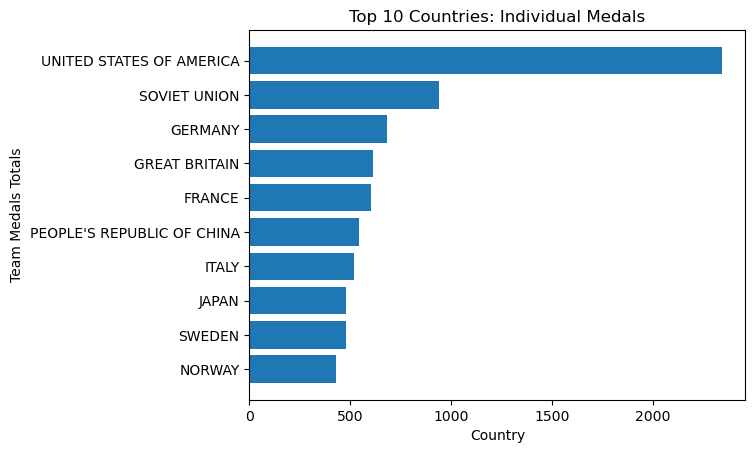

In [45]:
plt.barh(df_individual.index, df_individual.values)
plt.title("Top 10 Countries: Individual Medals")
plt.xlabel("Country")
plt.xticks(rotation = 0)
plt.ylabel("Team Medals Totals")

In [46]:
df_team = pd.DataFrame(team_results.groupby("COUNTRY_NAME")["MEDAL_TYPE"].value_counts())
df_team.columns = ["MEDAL_COUNT"]
df_team.reset_index(inplace = True)
df_team.sort_values("MEDAL_COUNT", ascending = False, ignore_index=True)
df_team = df_team.groupby("COUNTRY_NAME")["MEDAL_COUNT"].sum().sort_values(ascending = True).tail(10)

In [47]:
df_team

COUNTRY_NAME
PEOPLE'S REPUBLIC OF CHINA    169
AUSTRALIA                     193
CANADA                        193
SWEDEN                        193
ITALY                         236
SOVIET UNION                  263
FRANCE                        276
GREAT BRITAIN                 331
GERMANY                       364
UNITED STATES OF AMERICA      614
Name: MEDAL_COUNT, dtype: int64

Text(0, 0.5, 'Team Medals Totals')

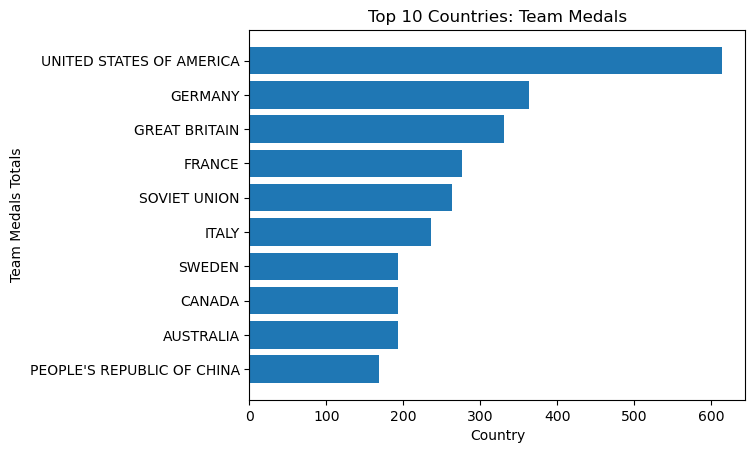

In [48]:
plt.barh(df_team.index, df_team.values)
plt.title("Top 10 Countries: Team Medals")
plt.xlabel("Country")
plt.xticks(rotation = 0)
plt.ylabel("Team Medals Totals")

In [86]:
results

,CITY,YEAR,DISCIPLINE_TITLE,EVENT_TITLE,PARTICIPANT_TYPE,ATHLETES_COMBINED,COUNTRY_NAME,COUNTRY_3_LETTER_CODE,MEDAL_TYPE,RANK_POSITION,VALUE_UNIT,VALUE_TYPE,ATHLETE_URL
0,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"STEFANIA CONSTANTINI, AMOS MOSANER",ITALY,ITA,GOLD,1,NaN,NaN,NaN
1,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"KRISTIN SKASLIEN, MAGNUS NEDREGOTTEN",NORWAY,NOR,SILVER,2,NaN,NaN,NaN
2,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"ALMIDA DE, OSKAR ERIKSSON",SWEDEN,SWE,BRONZE,3,NaN,NaN,NaN
3,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"JENNIFER DODDS, BRUCE MOUAT",GREAT BRITAIN,GBR,NaN,4,NaN,NaN,NaN
4,BEIJING,2022,CURLING,MIXED DOUBLES,GAMETEAM,"RACHEL HOMAN, JOHN MORRIS",CANADA,CAN,NaN,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162799,CHAMONIX,1924,SKI JUMPING,NORMAL HILL INDIVIDUAL MEN,ATHLETE,FRANCISZEK BUJAK,POLAND,POL,NaN,DNS,NaN,IRM,HTTPS://OLYMPICS.COM/EN/ATHLETES/FRANCISZEK-BUJAK
162800,CHAMONIX,1924,SKI JUMPING,NORMAL HILL INDIVIDUAL MEN,ATHLETE,HENRYK MÜCKENBRUNN,POLAND,POL,NaN,DNS,NaN,IRM,NaN
162801,CHAMONIX,1924,SKI JUMPING,NORMAL HILL INDIVIDUAL MEN,ATHLETE,MILDA PROKOPEC,CZECHOSLOVAKIA,TCH,NaN,DNS,NaN,IRM,NaN
162802,CHAMONIX,1924,SKI JUMPING,NORMAL HILL INDIVIDUAL MEN,ATHLETE,SIGURD OVERBY,UNITED STATES OF AMERICA,USA,NaN,DNS,NaN,IRM,NaN


In [92]:
# Group your dataset by two columns and then sort the aggregated results within the groups.

medalcount_country_discipline = results.groupby(["COUNTRY_NAME", "DISCIPLINE_TITLE"])["MEDAL_TYPE"].value_counts()
medalcount_country_discipline .loc["UNITED STATES OF AMERICA"].sort_values(ascending = False).head(20)

DISCIPLINE_TITLE     MEDAL_TYPE
ATHLETICS            GOLD          341
                     SILVER        270
SWIMMING             GOLD          258
ATHLETICS            BRONZE        213
SWIMMING             SILVER        179
                     BRONZE        144
SHOOTING             GOLD           57
WRESTLING            GOLD           55
BOXING               GOLD           50
DIVING               GOLD           48
                     SILVER         45
                     BRONZE         45
WRESTLING            SILVER         44
GYMNASTICS ARTISTIC  SILVER         42
BOXING               BRONZE         40
WRESTLING            BRONZE         39
GYMNASTICS ARTISTIC  BRONZE         36
                     GOLD           36
ROWING               GOLD           33
                     SILVER         32
Name: MEDAL_TYPE, dtype: int64

### What is the mean, min and max ages of first time olympians from each Olympics in the last Summer and Winter Olympics? 

In [65]:
athletes["FIRST_GAME_YEAR"].replace("UnknownYear", np.nan, inplace = True)
athletes["FIRST_GAME_YEAR"] = athletes["FIRST_GAME_YEAR"].astype(float)

In [73]:
recent_olympics = athletes.copy()
recent_olympics = recent_olympics[recent_olympics["FIRST_GAME_YEAR"].isin([2020, 2022])]

In [74]:
# Create a new column athletes["ATHLETE_AGE"]
recent_olympics["ATHLETE_AGE"] = recent_olympics["FIRST_GAME_YEAR"] - recent_olympics["ATHLETE_YEAR_BIRTH"]

In [84]:
recent_olympics.groupby("FIRST_GAME_CITY").agg({"ATHLETE_AGE": ["mean","min","max"]})

ATHLETE_AGE             
                       mean   min    max
FIRST_GAME_CITY                         
BEIJING           24.514385  14.0  122.0
TOKYO             25.309650  11.0   57.0

In [93]:
recent_olympics[recent_olympics["ATHLETE_AGE"] == 122]

,FIRST_NAME,LAST_NAME,ATHLETE_YEAR_BIRTH,FIRST_GAME,FIRST_GAME_CITY,FIRST_GAME_YEAR,GAMES_PARTICIPATIONS,MEDAL_COUNT,MEDAL_TYPE,ATHLETE_URL,ATHLETE_AGE
1604,RAIMO,VIGANTS,1900.0,Beijing 2022,BEIJING,2022.0,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/raimo-vigants,122.0
1610,THIBAUT,DE-MARRE,1900.0,Beijing 2022,BEIJING,2022.0,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/thibaut-de-marre,122.0


In [94]:
recent_olympics[recent_olympics["ATHLETE_AGE"] == 11]

,FIRST_NAME,LAST_NAME,ATHLETE_YEAR_BIRTH,FIRST_GAME,FIRST_GAME_CITY,FIRST_GAME_YEAR,GAMES_PARTICIPATIONS,MEDAL_COUNT,MEDAL_TYPE,ATHLETE_URL,ATHLETE_AGE
3580,HEND,ZAZA,2009.0,Tokyo 2020,TOKYO,2020.0,1,0,DID NOT MEDAL,https://olympics.com/en/athletes/hend-zaza,11.0


In [102]:
# Dropping the rows with the 
recent_olympics.drop(axis = 0, labels = recent_olympics[recent_olympics["ATHLETE_AGE"] == 122].index, inplace = True)

In [104]:
recent_olympics.groupby("FIRST_GAME_CITY").agg({"ATHLETE_AGE": ["mean","min","max"]})

ATHLETE_AGE            
                       mean   min   max
FIRST_GAME_CITY                        
BEIJING           24.344105  14.0  44.0
TOKYO             25.309650  11.0  57.0

In [119]:
recent_olympics["MEDAL_COUNT"] = recent_olympics["MEDAL_COUNT"].astype(int)

len(recent_olympics[recent_olympics["MEDAL_COUNT"] > 0])/len(recent_olympics["MEDAL_COUNT"]) * 100

16.53121902874133

## Conclusions

The Olympics data set covers the period what is knwon as the "Modern Olympics" starting in 1896 until the most recetn Olympic Gamesin Beiling, China in 2022. I picked this data set out of personal interest and when looking at the data it seemed to offer a lot of information and opportunities to work on cleaning the data. I was interested in finding out about what countries took home the most medals and in what disciplines each country seemed to excel at. From the bar graph above, the United states holds the most medals for both individual and team events followed by what is listed as the Soviet Union and Germany in individual and team events repsectively. In the last two olympics combined, approimately 16.5% of first time olympians took home a medal. 

I also wanted to look at the ages across countries and the diciplines in the two most recent Olympics. When calculating the ages of the athletes it seem like there was a discrepancy in some of the data as some values were very high 122 years old or very low 11 year old (as seen in the table above). When investigating the credibitly of these results, The two athletes listed as 122 years old had tehe wrong birth year listed. The youngest athlete at the 2020 Tokyo Olympics was in fact a 12 year old female Table Tennis player from Syria, Hend Zaza (her birthday was in January of the Olympic year - making her 12 at the time).  

If I had more time I would have liked to look at whether or not those who participated in more games were more likely to win medals and what the percentage of those who won a medal in their first olympic games, beyond the two most recent Olympics. I held off on looking at age because when I calculated the age for the entire athlete dataframe I had some negative ages as a result of incorrect data about the birth year. I could have filtered a range of ages between 20 and 40 but either way it may have excluded individuals whose birth year was incorrect.

Olympic data is interesting as it sheds light onto the potential contributers to winning a medal. Wealthier and or European countries seem to be winning more medals, shedding light on the inequalities that may exist in athlete development and opportunities. I am unaware of a centralized database of Olympic data base but I hope to continnue finding new insigths about this world wide event. 
